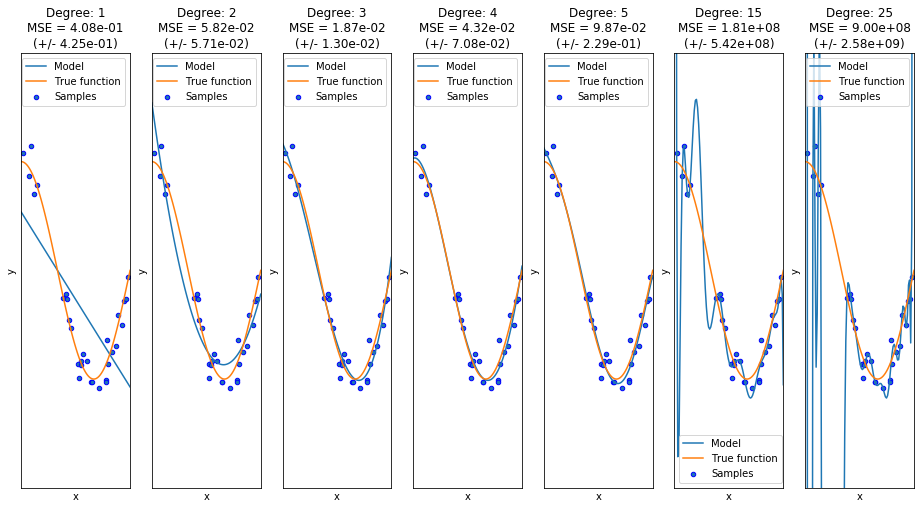

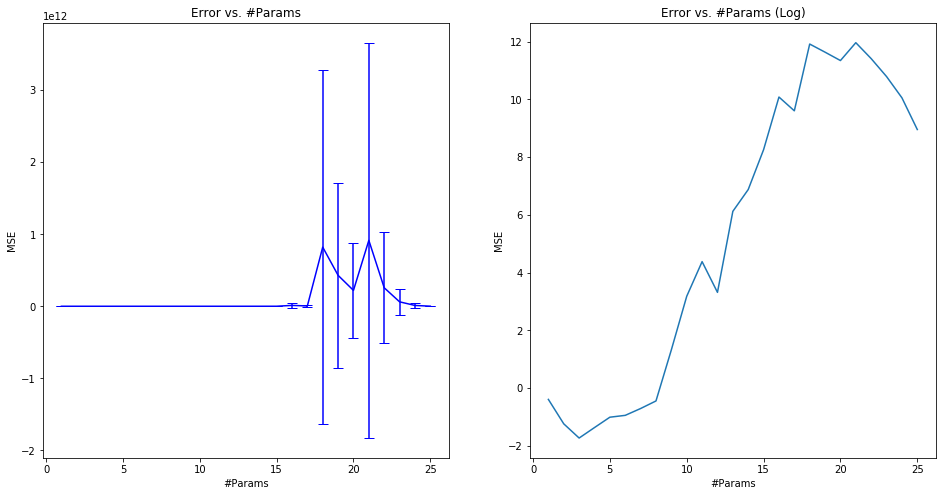

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

#################################################################################################################
# Adapted from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html #
#################################################################################################################

def true_fun(X):
#     return np.cos(3 * np.pi * X)
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
# degrees = [1, 2, 3, 4, 5, 15, 45]
degrees = [1, 2, 3, 4, 5, 15, 25]
degrees_np = np.asarray(degrees, dtype=np.int)

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(16, 8))

mse_list = list()

cnt = 1

# Iterating over degrees.
for i in range(degrees_np.min(), degrees_np.max() + 1):

    # Creating polynomial model.
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation.
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    if i in degrees:
        
        # Plotting.
        ax = plt.subplot(1, len(degrees), cnt)
        plt.setp(ax, xticks=(), yticks=())

        X_test = np.linspace(0, 1, 100)
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
        plt.plot(X_test, true_fun(X_test), label="True function")
        plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim((-2, 2))
        plt.legend(loc="best")
        plt.title("Degree: {}\nMSE = {:.2e}\n(+/- {:.2e})".format(i, -scores.mean(), scores.std()))
    
        cnt = cnt + 1

    mse_list.append([-scores.mean(), scores.std()])

plt.show()

# Plotting error according to # of model parameters.
mse_np = np.asarray(mse_list, dtype=np.float)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# ax[0].plot(mse_np[:, 0])
ax[0].errorbar(np.arange(1, mse_np.shape[0] + 1), mse_np[:, 0], yerr=mse_np[:, 1], fmt='b', capsize=5)
ax[0].set_title('Error vs. #Params')
ax[0].set_xlabel("#Params")
ax[0].set_ylabel("MSE")

ax[1].plot(np.arange(1, mse_np.shape[0] + 1), np.log10(mse_np[:, 0]))
ax[1].set_title('Error vs. #Params (Log)')
ax[1].set_xlabel("#Params")
ax[1].set_ylabel("MSE")

plt.show()